## 9 - Clustering

1 - Aplique os algoritmos K-means [1] e AgglomerativeClustering [2], experimentando as medidas de distância disponíveis. Compare os resultados, utilizando métricas de avaliação de clusteres (completeness e homogeneity, por exemplo) [3].

* [1] http://scikit-learn.org/stable/modules/clustering.html#k-means

* [2] http://scikit-learn.org/0.17/modules/clustering.html#hierarchical-clustering

* [3] http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

2 - Aplique o Método da Silhueta (Utilize silhouette_score [4] e/ou silhouette_samples [5]) em relação aos resultados do algoritmo K-means. Observe o resultado da avaliação (entenda as saídas dos métodos, conforme referências abaixo) e identifique a qualidade da sua clusterização. 

* [4] http://scikit-learn.org/0.17/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

* [5] http://scikit-learn.org/0.17/modules/generated/sklearn.metrics.silhouette_samples.html#sklearn.metrics.silhouette_samples

3 - Qual o valor de K (número de clusteres) você escolheu para a questão anterior? Desenvolva o Método do Cotovelo (não utilizar lib!) e descubra o K mais adequado. Após descobrir, aplique novamente o K-means com o K adequado. 

* Ajuda: atributos do [k-means](http://scikit-learn.org/0.17/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

4 - Após a questão 3, você aplicou o algoritmo com K apropriado. Refaça a questão 2 de acordo com os resultados de clusters obtidos com a questão anterior e verifique se o resultado melhorou.







In [64]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [80]:
dataset = load_iris()


In [77]:
X = dataset.data
Y = dataset.target

In [78]:
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [79]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [81]:
def PlotClusters(reduced_data_df, clustering):
    fig, ax = plt.subplots()
    ax.scatter(reduced_data_df[0], reduced_data_df[1], c=clustering)
    plt.show()
 # Original   
def PlotOrig(reduced_data_df, y):
    fig, ax = plt.subplots()
    ax.scatter(reduced_data_df[0], reduced_data_df[1], c=y)
    plt.show()
    return

In [82]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
predictions = kmeans.predict(X)
reduced_data = decomposition.PCA(n_components=2).fit_transform(X)
reduced_data_df = pd.DataFrame(reduced_data)
reduced_data_df[2] = predictions

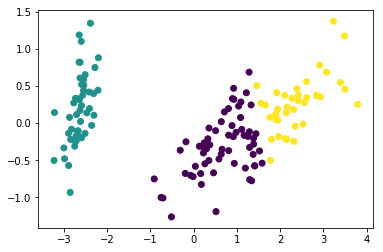

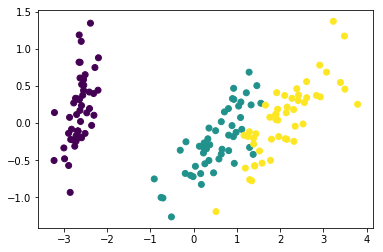

In [83]:
PlotClusters(reduced_data_df, reduced_data_df[2])
# Original
PlotOrig(reduced_data_df, y)


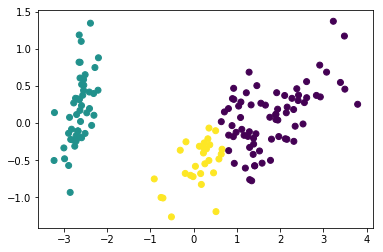

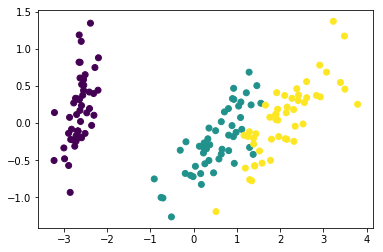

In [84]:
agglo = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="complete").fit_predict(X)
PlotClusters(reduced_data_df, agglo)
# Original
PlotOrig(reduced_data_df, y)

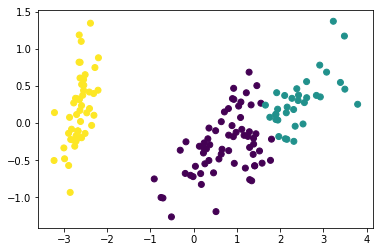

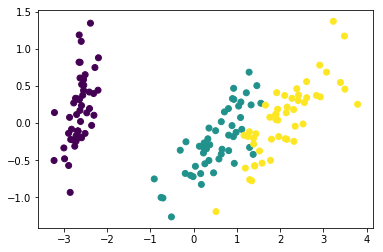

In [85]:
agglo_Manhattan = AgglomerativeClustering(n_clusters=3, affinity="manhattan", linkage="complete").fit_predict(X)
PlotClusters(reduced_data_df, agglo_Manhattan)
# Original
PlotOrig(reduced_data_df, y)

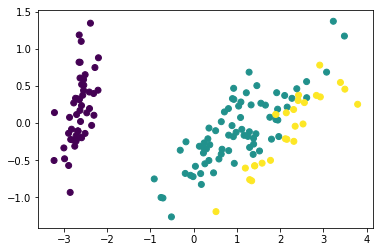

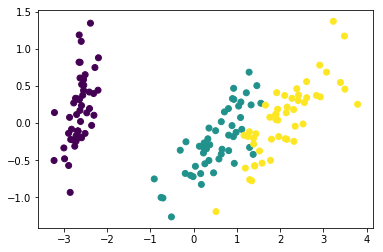

In [86]:
agglo_Cosine = AgglomerativeClustering(n_clusters=3, affinity="cosine", linkage="complete").fit_predict(X)
PlotClusters(reduced_data_df, agglo_Cosine)
# Original
PlotOrig(reduced_data_df, y)

In [87]:
#Euclidean
metric_AggloEuclidean_homo = metrics.homogeneity_score(y, agglo)
metric_AggloEuclidean_comp = metrics.completeness_score(y, agglo) 

#Cosine
metric_AggloCosine_homo = metrics.homogeneity_score(y, agglo_Cosine)
metric_AggloCosine_comp = metrics.completeness_score(y, agglo_Cosine)

#Manhattan
metric_AggloManhattan_homo = metrics.homogeneity_score(y, agglo_Manhattan)
metric_AggloManhattan_comp = metrics.completeness_score(y, agglo_Manhattan) 

#Kmeans
metric_Kmeans_homo = metrics.homogeneity_score(y, reduced_data_df[2])
metric_Kmeans_comp = metrics.completeness_score(y, reduced_data_df[2]) 

print ("Euclidean \n Homogeneity:", metric_AggloEuclidean_homo, "\n Completeness:", metric_AggloEuclidean_comp, "\n")
print ("Manhattan \n Homogeneity:", metric_AggloManhattan_homo, "\n Completeness:", metric_AggloManhattan_comp, "\n")
print ("Cosine \n Homogeneity:", metric_AggloCosine_homo, "\n Completeness:", metric_AggloCosine_comp,"\n")
print ("K-Means Metrics \n Homogeneity:", metric_Kmeans_homo, "\n Completeness:", metric_Kmeans_comp)

Euclidean 
 Homogeneity: 0.700115437096 
 Completeness: 0.745438275302 

Manhattan 
 Homogeneity: 0.778176865951 
 Completeness: 0.803588540623 

Cosine 
 Homogeneity: 0.717058965034 
 Completeness: 0.773421193274 

K-Means Metrics 
 Homogeneity: 0.751485402199 
 Completeness: 0.764986151449


## 2 QUESTÃO

In [88]:
#elbow
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])


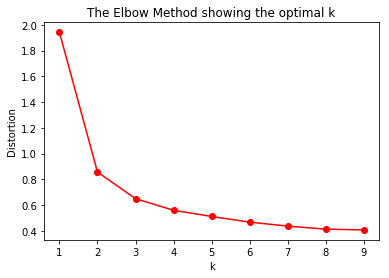

In [89]:
# Plot
plt.plot(K, distortions, 'ro-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

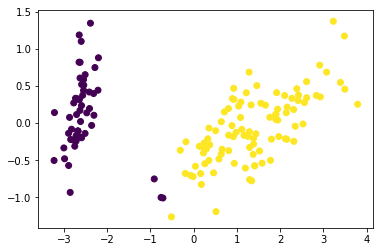

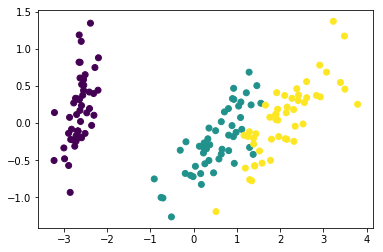

In [90]:
kmeansOptimal = KMeans(n_clusters=2).fit(X)
predictions = kmeansOptimal.predict(X)
PlotClusters(reduced_data_df, predictions)
# Original
PlotOrig(reduced_data_df, y)